In [1]:
# Loading the Dataset
import pandas as pd
import numpy as np
import os

# EDA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Feature Extraction
import librosa
import librosa.display
from IPython.display import Audio

# Scaling
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Training and Testing
from sklearn.model_selection import train_test_split

# Model Building
# LSTM
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, BatchNormalization, Flatten, Reshape
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# CNN
from tensorflow.keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D

# Prediction
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Accuracy and Loss Epochs
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Metrics Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support

In [2]:
paths = []
labels = []
for dirname, _,filenames in os.walk("/Zidio Internship Data Science Program/Projects/audio_speech_actors_01-24"):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label = filename.split("_")[-1]
        label = label.split(".")[0]
        labels.append(label.lower())
    
print("Dataset is loaded")

Dataset is loaded


In [3]:
paths[:5]

['/Zidio Internship Data Science Program/Projects/audio_speech_actors_01-24\\03-01-01-01-01-01-01.wav',
 '/Zidio Internship Data Science Program/Projects/audio_speech_actors_01-24\\03-01-01-01-01-01-02.wav',
 '/Zidio Internship Data Science Program/Projects/audio_speech_actors_01-24\\03-01-01-01-01-01-03.wav',
 '/Zidio Internship Data Science Program/Projects/audio_speech_actors_01-24\\03-01-01-01-01-01-04.wav',
 '/Zidio Internship Data Science Program/Projects/audio_speech_actors_01-24\\03-01-01-01-01-01-05.wav']

In [4]:
# Dictionary mapping for emotion labels
emotion_dic = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fear',
    '07': 'disgust',
    '08': 'surprised'
}

# Lists to store paths and mapped emotion labels
emotion_list = []
for path in paths:
    filename = os.path.basename(path)
    parts = filename.split('-')
    emotion_code = parts[2]  # Assuming the emotion code is in the third position (index 2)
    emotion_label = emotion_dic.get(emotion_code, "unknown")
    emotion_list.append(emotion_label)

# Convert to DataFrame if needed
emotion_df = pd.DataFrame({
    'path': paths,
    'emotion': emotion_list
})

# Display the first few rows to verify
emotion_df.head()

path  emotion
0  /Zidio Internship Data Science Program/Project...  neutral
1  /Zidio Internship Data Science Program/Project...  neutral
2  /Zidio Internship Data Science Program/Project...  neutral
3  /Zidio Internship Data Science Program/Project...  neutral
4  /Zidio Internship Data Science Program/Project...  neutral

In [5]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   path     1440 non-null   object
 1   emotion  1440 non-null   object
dtypes: object(2)
memory usage: 22.6+ KB


In [6]:
emotion_df['emotion'].unique()

array(['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust',
       'surprised'], dtype=object)

In [7]:
emotion_df['emotion'].value_counts()

emotion
calm         192
happy        192
sad          192
angry        192
fear         192
disgust      192
surprised    192
neutral       96
Name: count, dtype: int64

In [8]:
label_counts = emotion_df['emotion'].value_counts()

In [9]:
label_counts

emotion
calm         192
happy        192
sad          192
angry        192
fear         192
disgust      192
surprised    192
neutral       96
Name: count, dtype: int64

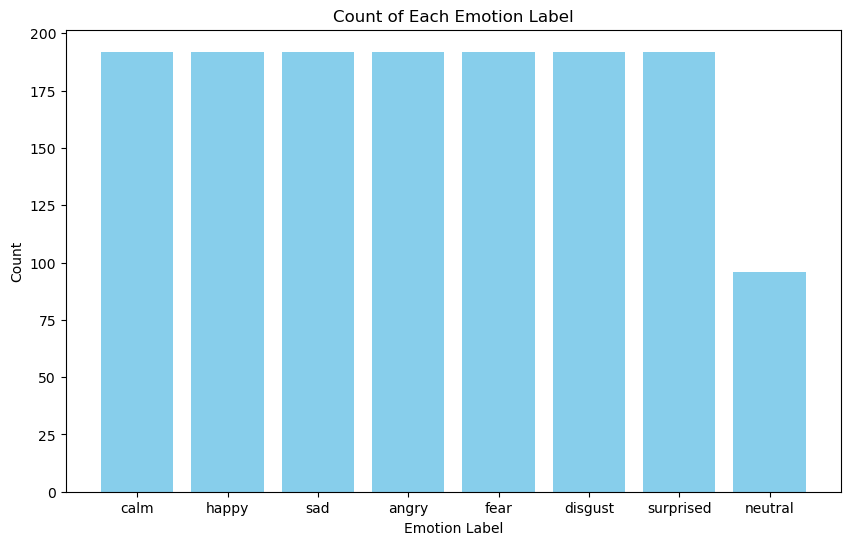

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.title('Count of Each Emotion Label')
plt.xticks(rotation=360)
plt.show()

In [11]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(9,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(9,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis='hz')
    plt.colorbar()

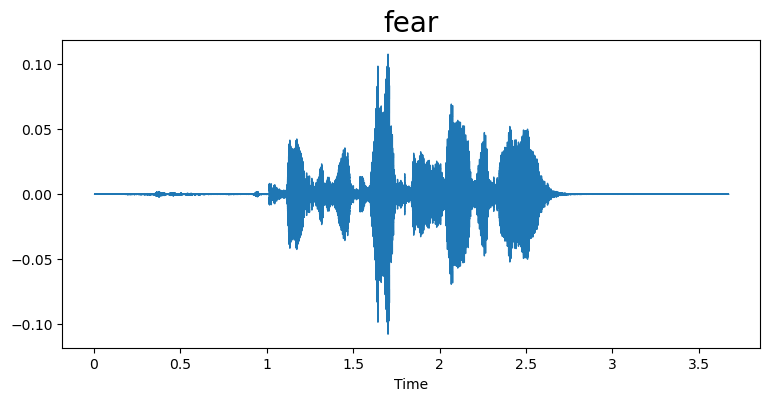

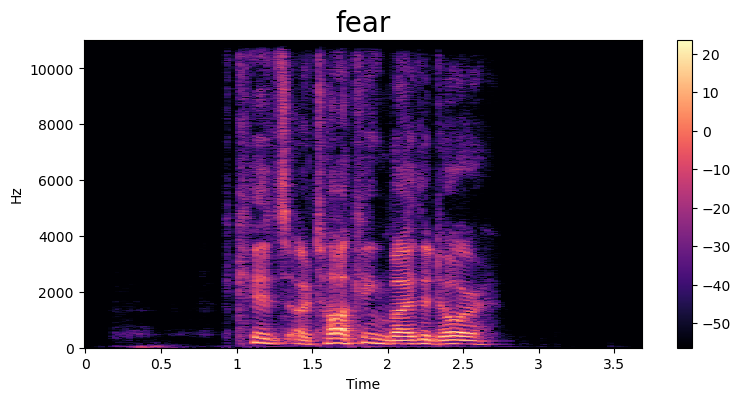

In [12]:
emotion = 'fear'
path = np.array(emotion_df['path'][emotion_df['emotion']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

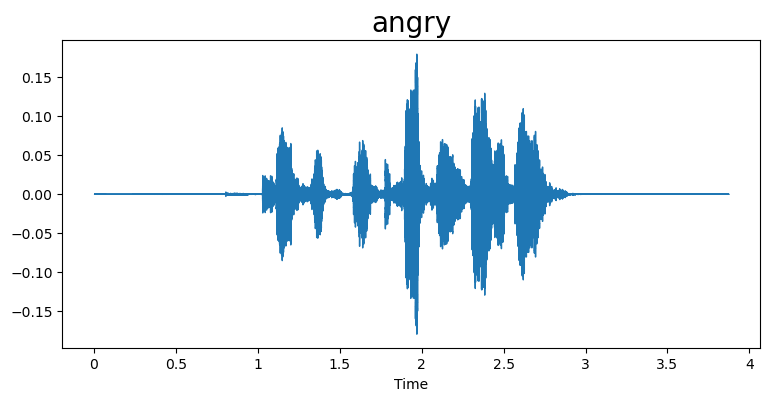

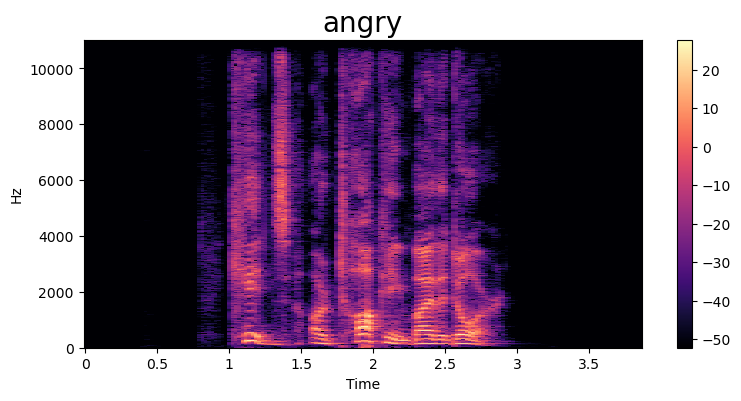

In [13]:
emotion = 'angry'
path = np.array(emotion_df['path'][emotion_df['emotion']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

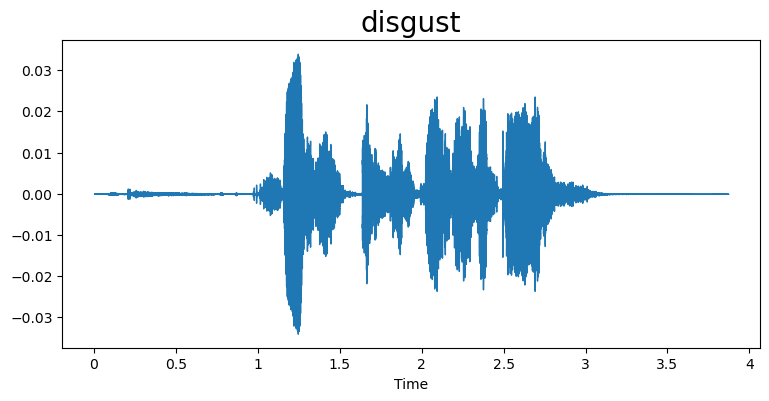

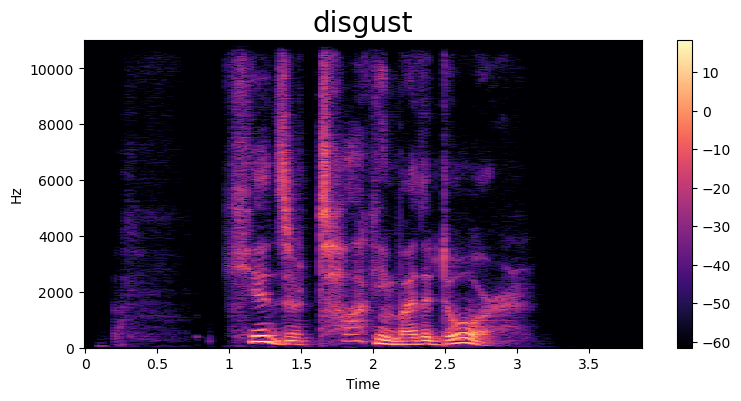

In [14]:
emotion = 'disgust'
path = np.array(emotion_df['path'][emotion_df['emotion']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

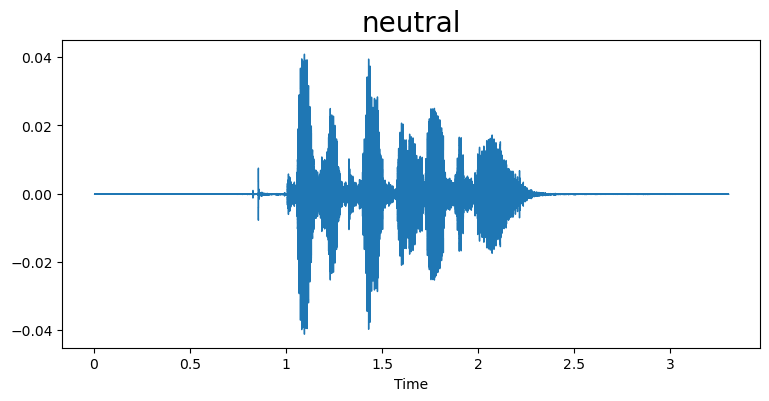

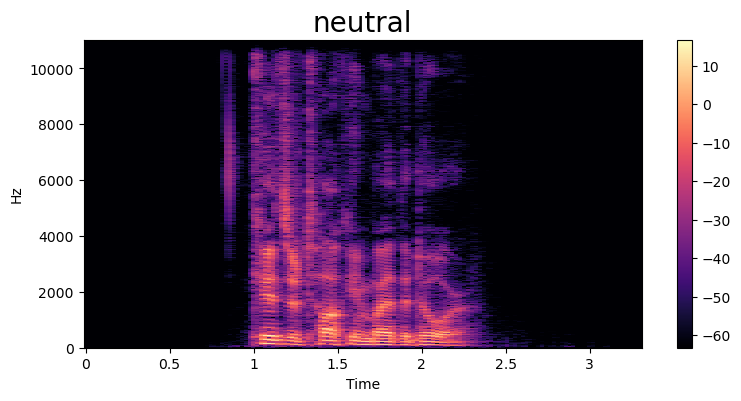

In [15]:
emotion = 'neutral'
path = np.array(emotion_df['path'][emotion_df['emotion']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

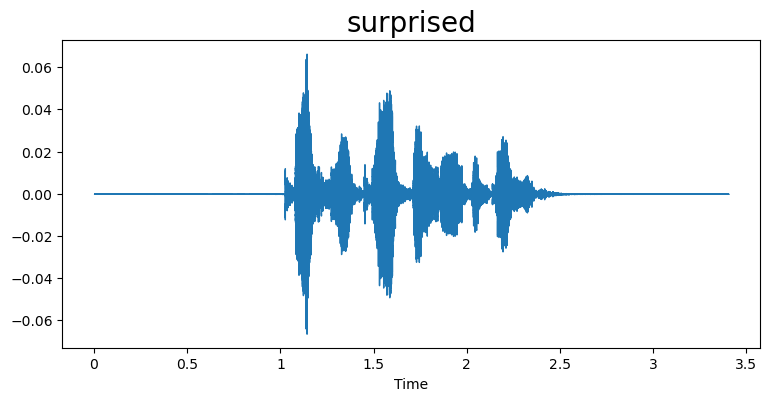

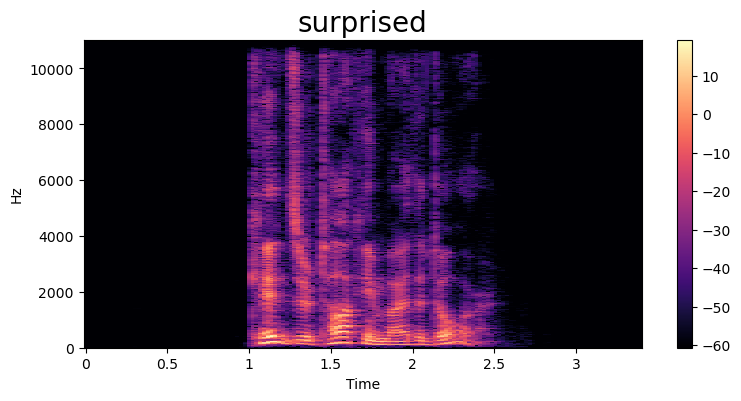

In [16]:
emotion = 'surprised'
path = np.array(emotion_df['path'][emotion_df['emotion']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

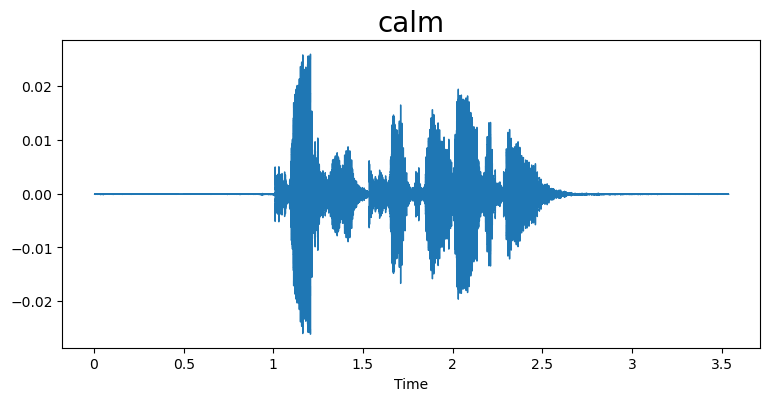

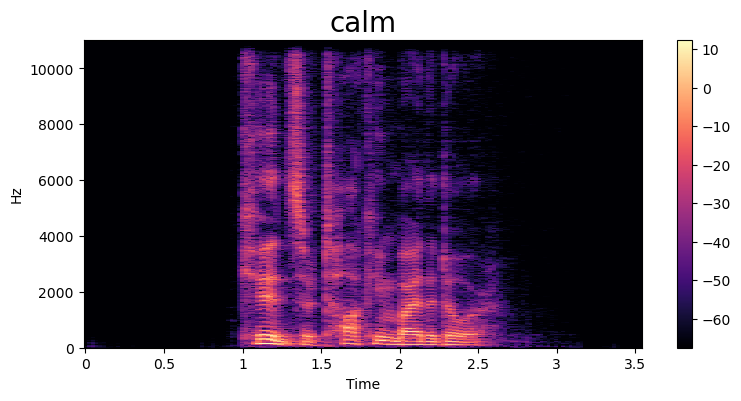

In [17]:
emotion = 'calm'
path = np.array(emotion_df['path'][emotion_df['emotion']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

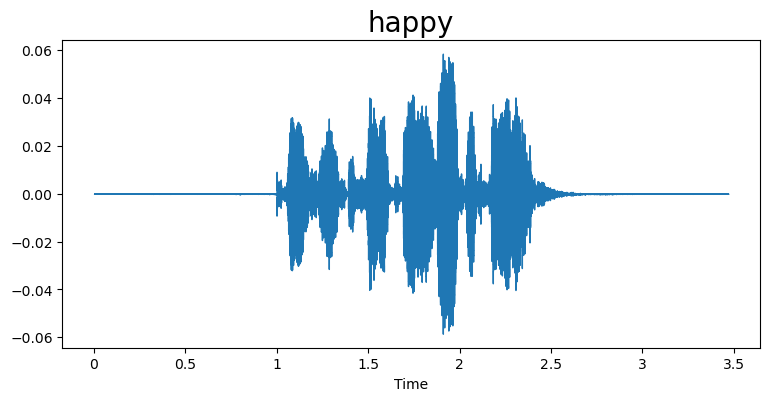

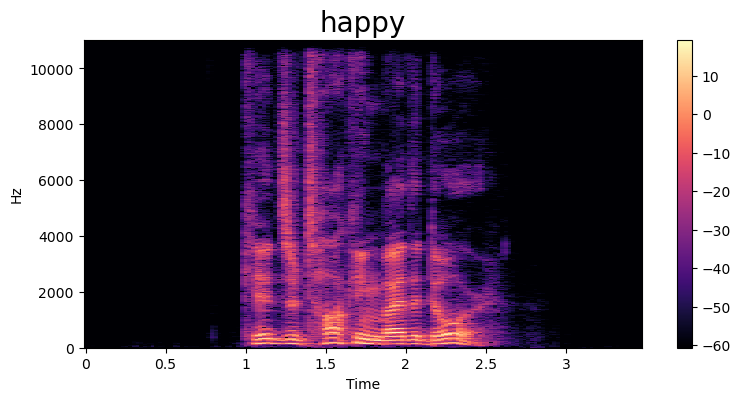

In [18]:
emotion = 'happy'
path = np.array(emotion_df['path'][emotion_df['emotion']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

## __Extracting Features__

In [96]:
def extract_mfcc(filename):
    y,sr = librosa.load(filename,duration =3,offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [97]:
extract_mfcc(emotion_df['path'][0])

array([-6.7019543e+02,  6.5063850e+01,  8.8895434e-01,  1.4715980e+01,
        9.1821651e+00,  6.6057473e-01, -3.8468361e+00, -3.5839462e+00,
       -1.2959006e+01, -3.3001330e+00,  9.1077948e-01, -3.5970359e+00,
        2.3762746e+00, -4.3889413e+00,  5.4508036e-01,  8.9185160e-01,
       -4.8025908e+00, -2.1054137e+00, -1.6059692e+00, -1.0523903e+00,
       -7.0672808e+00, -6.2306100e-01, -2.7280300e+00, -5.3073611e+00,
       -1.9691167e+00, -9.4615275e-01, -5.7211108e+00,  3.3299121e-01,
       -2.5438452e+00,  1.8220837e-01, -2.3510976e+00, -2.5047269e+00,
       -3.1515074e+00, -2.1908991e+00, -3.8017602e+00, -1.8130876e+00,
       -1.2612224e+00, -2.1449544e+00, -4.1521730e+00, -1.7796154e+00],
      dtype=float32)

In [98]:
x_mfcc = emotion_df['path'].apply(lambda x: extract_mfcc(x))

In [99]:
x_mfcc

0       [-670.19543, 65.06385, 0.88895434, 14.71598, 9...
1       [-614.99786, 64.27647, -12.088927, 9.41706, -5...
2       [-585.2709, 65.953766, -3.3687484, 12.292631, ...
3       [-663.22577, 50.415646, -8.746946, 10.637102, ...
4       [-683.20856, 80.11589, 7.9506874, 16.284683, 1...
                              ...                        
1435    [-560.3368, 38.236683, -20.307865, 4.6272163, ...
1436    [-484.9119, 52.183716, -3.460623, 12.275539, 3...
1437    [-496.7466, 29.797121, -16.75864, -7.013239, -...
1438    [-498.1352, 39.734634, -13.461919, -2.2899392,...
1439    [-485.24686, 34.517685, -2.6824563, -2.7403817...
Name: path, Length: 1440, dtype: object

In [100]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(1440, 40)

## __Standard Scaling__

In [101]:
enc = OneHotEncoder(sparse=False)  # sparse=False to get an array directly
y = enc.fit_transform(emotion_df[['emotion']])

In [102]:
y.shape

(1440, 8)

## Training and Testing the data

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Check shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1152, 40)
X_test shape: (288, 40)
y_train shape: (1152, 8)
y_test shape: (288, 8)


In [105]:
# Input Split
x_train = np.expand_dims(X_train,-1)
x_train.shape

(1152, 40, 1)

In [106]:
# Input Split
x_test = np.expand_dims(X_test,-1)
x_test.shape

(288, 40, 1)

In [140]:
#Create LSTM Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model_lstm = Sequential([
    LSTM(128,return_sequences=False,input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(8,activation='softmax')
])

#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,160 (301.41 KB)

 Trainable params: 77,160 (301.41 KB)

 Non-trainable params: 0 (0.00 B)

In [141]:
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [147]:
# Train the model
history_lstm = model_lstm.fit(X_train,y_train,epochs=100,batch_size=256,validation_data = (X_test, y_test))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.9927 - loss: 0.0353 - val_accuracy: 0.4757 - val_loss: 4.0877
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.9964 - loss: 0.0256 - val_accuracy: 0.4618 - val_loss: 4.0967
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9884 - loss: 0.0369 - val_accuracy: 0.4757 - val_loss: 4.0860
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.9925 - loss: 0.0303 - val_accuracy: 0.4757 - val_loss: 4.1026
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.9944 - loss: 0.0272 - val_accuracy: 0.4757 - val_loss: 4.1167
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.9956 - loss: 0.0240 - val_accuracy: 0.4653 - val_loss: 4.1593
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.9924 - loss: 0.0284 - val_accuracy: 0.4549 - val_loss: 4.2201
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.9918 - loss: 0.0326 - val_accuracy: 0.4549 - v

In [119]:
lstm_train = model_lstm.predict(x_train)
lstm_test = model_lstm.predict(x_test)


# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(lstm_train, y_train)

# Make predictions using Random Forest classifier
predictions_lstm = rf_classifier.predict(lstm_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [41]:
model_cnn = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 38, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 17, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,032 (285.28 KB)

 Trainable params: 73,032 (285.28 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
optimizer = Adam(learning_rate=0.001)

In [43]:
model_cnn.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [46]:
history_cnn = model_cnn.fit(X, y, batch_size=64, epochs=100, verbose=1, validation_data = (X, y))

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9111 - loss: 0.2273 - val_accuracy: 0.9979 - val_loss: 0.0224
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9441 - loss: 0.1859 - val_accuracy: 0.9979 - val_loss: 0.0152
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9292 - loss: 0.1978 - val_accuracy: 0.9972 - val_loss: 0.0183
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9250 - loss: 0.2149 - val_accuracy: 0.9979 - val_loss: 0.0165
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9138 - loss: 0.2089 - val_accuracy: 0.9986 - val_loss: 0.0154
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9314 - loss: 0.1768 - val_accuracy: 0.9993 - val_loss: 0.0166
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9311 - loss: 0.1966 - val_accuracy: 1.0000 - val_loss: 0.0146
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9382 - loss: 0.1644 - val_accuracy: 0.9986 - v

In [47]:
cnn_train = model_cnn.predict(x_train)
cnn_test = model_cnn.predict(x_test)


# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(cnn_train, y_train)

# Make predictions using Random Forest classifier
predictions_cnn = rf_classifier.predict(cnn_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [48]:
# Define the combined CNN-LSTM model
model = Sequential([
    # CNN Layers
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    # Flatten layer
    Flatten(),
    
    # Calculate the number of units in LSTM
    # Here the number 128 is used as an example; adjust if necessary
    Dense(128, activation='relu'),
    Reshape((1, 128)),  # Adjust based on output from Dense layer
    
    # LSTM Layer
    LSTM(128, return_sequences=False),
    
    # Dense Layers
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='softmax')  # Number of classes
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 38, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 17, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 214,184 (836.66 KB)

 Trainable params: 214,184 (836.66 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Train the model
history_cnn_lstm = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.6146 - val_loss: 2.6298
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.6319 - val_loss: 2.6798
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 0.6319 - val_loss: 2.7365
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9993 - loss: 0.0076 - val_accuracy: 0.6250 - val_loss: 2.6743
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9996 - loss: 0.0054 - val_accuracy: 0.6146 - val_loss: 2.7459
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9990 - loss: 0.0103 - val_accuracy: 0.6181 - val_loss: 2.6885
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9971 - loss: 0.0079 - val_accuracy: 0.6250 - val_loss: 2.7038
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9964 - loss: 0.0122 - val_accuracy: 0.6111 - 

In [51]:
cnn_lstm_train = model.predict(x_train)
cnn_lstm_test = model.predict(x_test)


# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(cnn_train, y_train)

# Make predictions using Random Forest classifier
predictions_cnn_lstm = rf_classifier.predict(cnn_lstm_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [39]:
#Plot the results

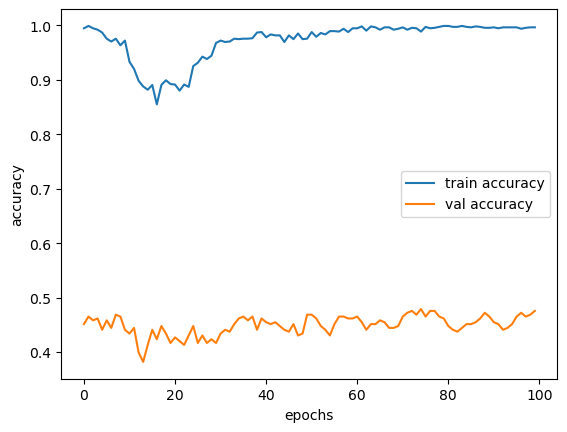

In [120]:
epochs = list(range(100))
acc = history_lstm.history['accuracy']
val_acc = history_lstm.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

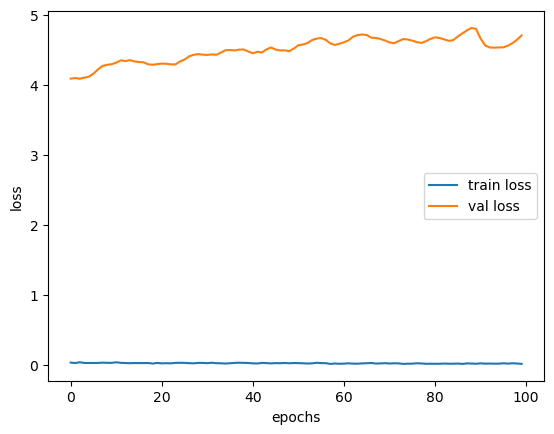

In [148]:
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

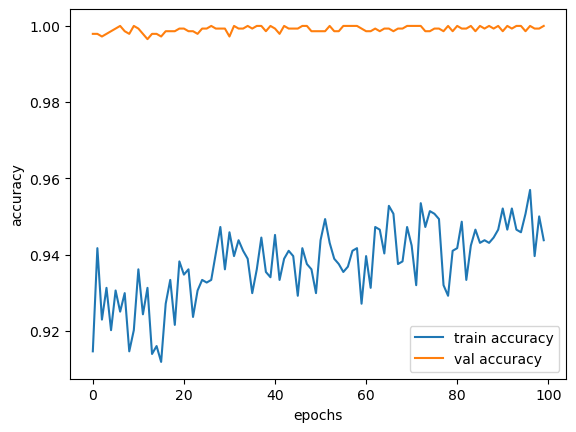

In [149]:
epochs = list(range(100))
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

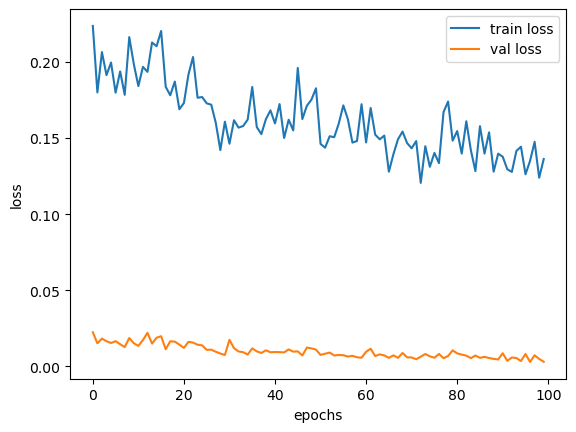

In [77]:
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

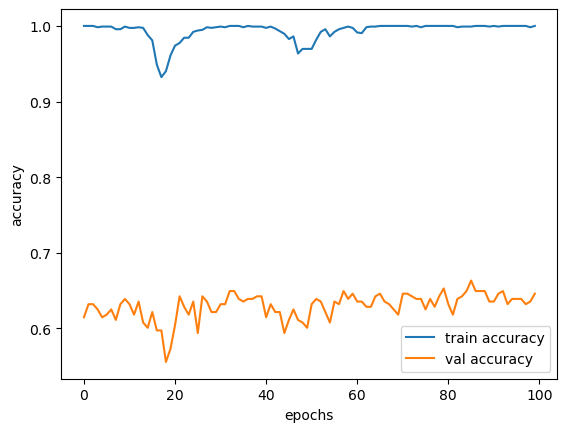

In [150]:
epochs = list(range(100))
acc = history_cnn_lstm.history['accuracy']
val_acc = history_cnn_lstm.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

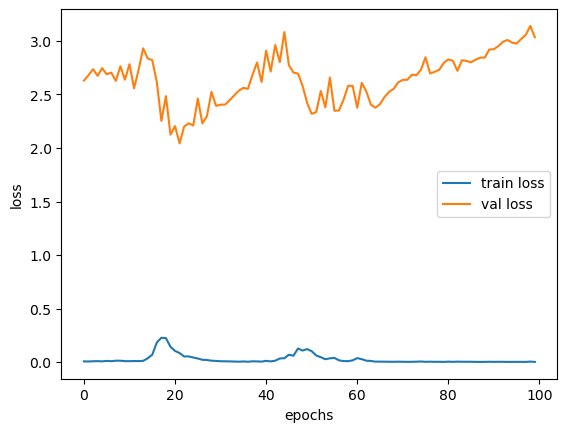

In [151]:
loss = history_cnn_lstm.history['loss']
val_loss = history_cnn_lstm.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## CNN Metrics

In [152]:
accuracy_cnn = accuracy_score(y_test,predictions_cnn)
print("Accuracy: ", accuracy_cnn)

Accuracy:  1.0


In [153]:
precision_cnn = precision_score(y_test, predictions_cnn, average='weighted')
print("Precision: ", precision_cnn)

Precision:  1.0


In [154]:
recall_cnn = recall_score(y_test, predictions_cnn, average='weighted')
print("Recall: ", recall_cnn)

Recall:  1.0


In [155]:
precision_f1 = precision_score(y_test, predictions_cnn, average='weighted')
recall_f1 = recall_score(y_test, predictions_cnn, average='weighted')

f1_score_cnn = 2 * (precision_f1 * recall_f1) / (precision_f1 + recall_f1)

print("F1-Score: ", f1_score_cnn)

F1-Score:  1.0


## LSTM Metrics

In [156]:
accuracy_lstm = accuracy_score(y_test,predictions_lstm)
print("Accuracy: ", accuracy_lstm)

Accuracy:  0.4756944444444444


In [157]:
precision_lstm = precision_score(y_test, predictions_lstm, average='weighted')
print("Precision: ", precision_lstm)

Precision:  0.49014965587590187


In [158]:
recall_lstm = recall_score(y_test, predictions_lstm, average='weighted')
print("Recall: ", recall_lstm)

Recall:  0.4756944444444444


In [159]:
precision_f1 = precision_score(y_test, predictions_lstm, average='weighted')
recall_f1 = recall_score(y_test, predictions_lstm, average='weighted')

f1_score_lstm = 2 * (precision_f1 * recall_f1) / (precision_f1 + recall_f1)

print("F1-Score: ", f1_score_lstm)

F1-Score:  0.48281387890486455


## LSTM + CNN Metrics

In [160]:
accuracy_cnn_lstm = accuracy_score(y_test,predictions_cnn_lstm)
print("Accuracy: ", accuracy_lstm)

Accuracy:  0.4756944444444444


In [161]:
precision_cnn_lstm = precision_score(y_test, predictions_cnn_lstm, average='weighted')
print("Precision: ", precision_cnn_lstm)

Precision:  0.6554299048816593


In [162]:
recall_cnn_lstm = recall_score(y_test, predictions_cnn_lstm, average='weighted')
print("Recall: ", recall_cnn_lstm)

Recall:  0.6458333333333334


In [163]:
precision_f1 = precision_score(y_test, predictions_cnn_lstm, average='weighted')
recall_f1 = recall_score(y_test, predictions_cnn_lstm, average='weighted')

f1_score_cnn_lstm = 2 * (precision_f1 * recall_f1) / (precision_f1 + recall_f1)

print("F1-Score: ", f1_score_cnn_lstm)

F1-Score:  0.6505962326527124


In [164]:
# Results for each model
results = {
    'Model': ['CNN', 'LSTM', 'CNN + LSTM'],
    'Accuracy': [accuracy_cnn, accuracy_lstm, accuracy_cnn_lstm],
    'Precision': [precision_cnn, precision_lstm, precision_cnn_lstm],
    'Recall': [recall_cnn, recall_lstm, recall_cnn_lstm],
    'F1 Score': [f1_score_cnn, f1_score_lstm, f1_score_cnn_lstm]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Display DataFrame
results_df

Model  Accuracy  Precision    Recall  F1 Score
0         CNN  1.000000    1.00000  1.000000  1.000000
1        LSTM  0.475694    0.49015  0.475694  0.482814
2  CNN + LSTM  0.645833    0.65543  0.645833  0.650596

## CNN and LSTM model predicted the speech emotion recognition with 100% Accuracy.